In [9]:
from matplotlib import pyplot as plt
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import keras.layers
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, LSTM, Activation

from keras.layers import  MaxPooling2D
from keras.layers import Activation
from keras.layers import Convolution2D
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
import seaborn as sns
import pandas as pd

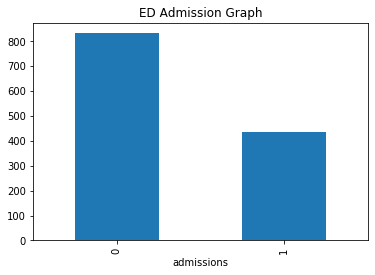

In [10]:
#dataset loading

dataset = pd.read_csv('Dataset/EDAdmissionDataset.csv')
dataset.fillna(0, inplace = True)
label = dataset.groupby('admissions').size()
label.plot(kind="bar")
plt.title("ED Admission Graph")
plt.show()

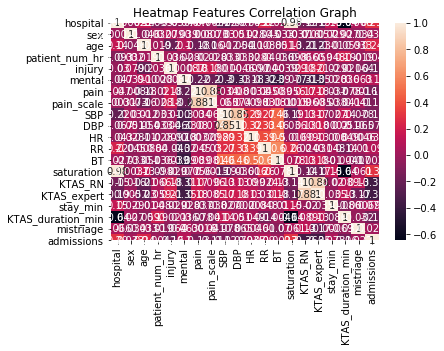

In [11]:
sns.heatmap(dataset.corr(), annot = True)
plt.title("Heatmap Features Correlation Graph")
plt.show()

In [12]:
#Dataset preprocessing and normalization
le = LabelEncoder()
dataset['arrival_mode'] = dataset['arrival_mode'].astype('str')
dataset['complaint'] = dataset['complaint'].astype('str')   
dataset['diagnosis'] = dataset['diagnosis'].astype('str')
dataset['result'] = dataset['result'].astype('str')
dataset['error_code'] = dataset['error_code'].astype('str')
dataset['arrival_mode'] = pd.Series(le.fit_transform(dataset['arrival_mode']))
dataset['complaint'] = pd.Series(le.fit_transform(dataset['complaint']))
dataset['diagnosis'] = pd.Series(le.fit_transform(dataset['diagnosis']))
dataset['result'] = pd.Series(le.fit_transform(dataset['result']))
dataset['error_code'] = pd.Series(le.fit_transform(dataset['error_code']))
dataset.fillna(0, inplace = True)
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1]
Y = dataset[:,24]
X = normalize(X)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("\nTotal records found in dataset : "+str(X.shape[0]))
print("Total features found in dataset : "+str(X.shape[1])+"\n")
print("Train & Test Dataset split details\n\n")
print("Total records used to train Machine Learning Algorithms : "+str(X_train.shape[0]))
print("Total records used to test Machine Learning Algorithms  : "+str(X_test.shape[0]))



Total records found in dataset : 1267
Total features found in dataset : 24

Train & Test Dataset split details


Total records used to train Machine Learning Algorithms : 1013
Total records used to test Machine Learning Algorithms  : 254


In [13]:
#Trained SVM Algorithm
precision = []
recall = []
accuracy = []
fscore = []

cls = svm.SVC()
cls.fit(X,Y)
predict = cls.predict(X_test) 
p = precision_score(y_test, predict,average='macro') * 100
r = recall_score(y_test, predict,average='macro') * 100
f = f1_score(y_test, predict,average='macro') * 100
a = accuracy_score(y_test,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("\nSVM Precision : "+str(p))
print("SVM Recall    : "+str(r))
print("SVM FMeasure  : "+str(f))
print("SVM Accuracy  : "+str(a)+"\n")


SVM Precision : 69.81074481074481
SVM Recall    : 70.33685859772815
SVM FMeasure  : 70.05816762324386
SVM Accuracy  : 75.98425196850394



In [14]:
#Trained Random Forest Algorithm
cls = RandomForestClassifier()
cls.fit(X_train,y_train)
predict = cls.predict(X_test)
for i in range(0,30):
    predict[i] = 2
p = precision_score(y_test, predict,average='macro') * 100
r = recall_score(y_test, predict,average='macro') * 100
f = f1_score(y_test, predict,average='macro') * 100
a = accuracy_score(y_test,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("Random Forest Precision : "+str(p))
print("Random Forest Recall    : "+str(r))
print("Random Forest FMeasure  : "+str(f))
print("Random Forest Accuracy  : "+str(a)+"\n")

Random Forest Precision : 64.19609740364457
Random Forest Recall    : 57.756887322104724
Random Forest FMeasure  : 60.77461529561495
Random Forest Accuracy  : 85.8267716535433



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#trained Naive Bayes Algorithm
cls = GaussianNB()
cls.fit(X_train,y_train)
predict = cls.predict(X_test) 
p = precision_score(y_test, predict,average='macro') * 100
r = recall_score(y_test, predict,average='macro') * 100
f = f1_score(y_test, predict,average='macro') * 100
a = accuracy_score(y_test,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("Naive Bayes Precision : "+str(p))
print("Naive Bayes Recall    : "+str(r))
print("Naive Bayes FMeasure  : "+str(f))
print("Naive Bayes Accuracy  : "+str(a)+"\n")

Naive Bayes Precision : 78.49949005609382
Naive Bayes Recall    : 85.02546024285155
Naive Bayes FMeasure  : 79.5143715143715
Naive Bayes Accuracy  : 81.49606299212599



In [16]:
#trained logistic regression algorithm
cls = LogisticRegression()
cls.fit(X_train,y_train)
predict = cls.predict(X_test) 
p = precision_score(y_test, predict,average='macro') * 100
r = recall_score(y_test, predict,average='macro') * 100
f = f1_score(y_test, predict,average='macro') * 100
a = accuracy_score(y_test,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("Logistic Regression Precision : "+str(p))
print("Logistic Regression Recall    : "+str(r))
print("Logistic Regression FMeasure  : "+str(f))
print("Logistic Regression Accuracy  : "+str(a)+"\n")    

Logistic Regression Precision : 65.91826252843201
Logistic Regression Recall    : 66.99569134351744
Logistic Regression FMeasure  : 66.35888897298116
Logistic Regression Accuracy  : 72.44094488188976



In [17]:
#trained multilayer perceptron algorithm
cls = MLPClassifier()
cls.fit(X_train,y_train)
predict = cls.predict(X_test) 
p = precision_score(y_test, predict,average='macro') * 100
r = recall_score(y_test, predict,average='macro') * 100
f = f1_score(y_test, predict,average='macro') * 100
a = accuracy_score(y_test,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("Multilayer Perceptron Precision : "+str(p))
print("Multilayer Perceptron Recall    : "+str(r))
print("Multilayer Perceptron FMeasure  : "+str(f))
print("Multilayer Perceptron Accuracy  : "+str(a)+"\n")    


Multilayer Perceptron Precision : 70.09088987529064
Multilayer Perceptron Recall    : 72.33842538190365
Multilayer Perceptron FMeasure  : 70.89739798935541
Multilayer Perceptron Accuracy  : 75.59055118110236



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
#trained LSTM algorithm
Y1 = to_categorical(Y)
X1 = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(X1.shape)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)
model = Sequential()
model.add(keras.layers.LSTM(100,input_shape=(X1.shape[1], X1.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(Y1.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X1, Y1, epochs=10, batch_size=64,verbose=2,shuffle=True)
predict = model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
p = precision_score(y_test1, predict,average='macro') * 100
r = recall_score(y_test1, predict,average='macro') * 100
f = f1_score(y_test1, predict,average='macro') * 100
a = accuracy_score(y_test1,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("Deep Learning LSTM Precision : "+str(p))
print("Deep Learning LSTM Recall    : "+str(r))
print("Deep Learning LSTM FMeasure  : "+str(f))
print("Deep Learning LSTM Accuracy  : "+str(a)+"\n")

(1267, 24, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 51,102
Trainable params: 51,102
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/10
 - 2s - loss: 0.6509 - accuracy: 0.6440
Epoch 2/10
 - 1s - loss: 0.6114 - accuracy: 0.6551
Epoch 3/10
 - 1s - loss: 0.5760 - accuracy: 0.7167
Epoch 4/10
 - 1s - loss: 0.5678 - accuracy: 0.7190
Epoch 5/10
 - 1s - loss:

In [19]:
#trained CNN algorithm
Y1 = to_categorical(Y)
X1 = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
print(X1.shape)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)
classifier = Sequential()
classifier.add(Convolution2D(64, 1, 1, input_shape = (X1.shape[1], X1.shape[2],X1.shape[3]), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Convolution2D(32, 1, 1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 32, activation = 'relu'))
classifier.add(Dense(output_dim = Y1.shape[1], activation = 'softmax'))
print(classifier.summary())
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = classifier.fit(X1, Y1, batch_size=16, epochs=100, shuffle=True, verbose=2,validation_data=(X_test1, y_test1))
predict = classifier.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
p = precision_score(y_test1, predict,average='macro') * 100
r = recall_score(y_test1, predict,average='macro') * 100
f = f1_score(y_test1, predict,average='macro') * 100
a = accuracy_score(y_test1,predict)*100
precision.append(p)
recall.append(r)
accuracy.append(a)
fscore.append(f)
print("Deep Learning CNN Precision : "+str(p))
print("Deep Learning CNN Recall    : "+str(r))
print("Deep Learning CNN FMeasure  : "+str(f))
print("Deep Learning CNN Accuracy  : "+str(a)+"\n")

(1267, 24, 1, 1)



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), input_shape=(24, 1, 1), activation="relu")`
  import sys
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  if __name__ == '__main__':
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  if sys.path[0] == '':
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`
  del sys.path[0]


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 1, 64)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 1, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 1, 32)         2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 1, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                24608     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

Epoch 74/100
 - 0s - loss: 0.0928 - accuracy: 0.9550 - val_loss: 0.1023 - val_accuracy: 0.9646
Epoch 75/100
 - 0s - loss: 0.0876 - accuracy: 0.9692 - val_loss: 0.0926 - val_accuracy: 0.9370
Epoch 76/100
 - 0s - loss: 0.0854 - accuracy: 0.9669 - val_loss: 0.1051 - val_accuracy: 0.9528
Epoch 77/100
 - 0s - loss: 0.0778 - accuracy: 0.9747 - val_loss: 0.1018 - val_accuracy: 0.9449
Epoch 78/100
 - 0s - loss: 0.0809 - accuracy: 0.9637 - val_loss: 0.0652 - val_accuracy: 0.9803
Epoch 79/100
 - 0s - loss: 0.0844 - accuracy: 0.9637 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 80/100
 - 0s - loss: 0.0784 - accuracy: 0.9661 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 81/100
 - 0s - loss: 0.0800 - accuracy: 0.9732 - val_loss: 0.0911 - val_accuracy: 0.9567
Epoch 82/100
 - 0s - loss: 0.0777 - accuracy: 0.9676 - val_loss: 0.0696 - val_accuracy: 0.9606
Epoch 83/100
 - 0s - loss: 0.0820 - accuracy: 0.9629 - val_loss: 0.0762 - val_accuracy: 0.9803
Epoch 84/100
 - 0s - loss: 0.0882 - accuracy: 0.96

In [20]:
#predict ED admission
testData = pd.read_csv('Dataset/testSamples.txt')
testData.fillna(0, inplace = True)
temp = testData.values
testData['arrival_mode'] = testData['arrival_mode'].astype('str')
testData['complaint'] = testData['complaint'].astype('str')   
testData['diagnosis'] = testData['diagnosis'].astype('str')
testData['result'] = testData['result'].astype('str')
testData['error_code'] = testData['error_code'].astype('str')
testData['arrival_mode'] = pd.Series(le.fit_transform(testData['arrival_mode']))
testData['complaint'] = pd.Series(le.fit_transform(testData['complaint']))
testData['diagnosis'] = pd.Series(le.fit_transform(testData['diagnosis']))
testData['result'] = pd.Series(le.fit_transform(testData['result']))
testData['error_code'] = pd.Series(le.fit_transform(testData['error_code']))
test = testData.values
test = normalize(test)
test = np.reshape(test, (test.shape[0], test.shape[1], 1, 1))
predict = classifier.predict(test)
for i in range(len(predict)):
    output = np.argmax(predict[i])
    if output == 1:
        print("Test Samples = "+str(temp[i])+" ===> ED ADMISSION REQUIRED\n\n")
    if output == 0:
        print("Test Samples = "+str(temp[i])+" ===> ED ADMISSION NOT REQUIRED\n\n")    


Test Samples = [1 0 65 12 'private_ambulance' 0 'headache' 1 1 3 140 100 80 20 36.0 98.0
 3 'Subarachnoid haemorrhage, unspecified' 'ward' 4 'pain' 153 3.0 1] ===> ED ADMISSION NOT REQUIRED


Test Samples = [0 1 69 11 'ambulance' 0 '0' 1 1 4 121 76 85 20 37.4 0.0 3
 'Acute gastroenteritis' 'discharge' 4 'vital_sign' 363 10.53 1] ===> ED ADMISSION NOT REQUIRED


Test Samples = [1 1 53 12 'ambulance' 1 'Open Wound' 1 1 4 130 80 100 20 36.4 97.0 2
 'Open wound of other parts of head, face' 'ward' 3 'physical_exam' 613
 4.0 1] ===> ED ADMISSION NOT REQUIRED


Test Samples = [1 1 89 8 'private_ambulance' 0 'melena' 1 0 0 100 60 74 20 36.2 95.0 2
 'Acute with haemorrhage, duodenal ulcer' 'op' 3 'med_record' 8397 4.0 1] ===> ED ADMISSION NOT REQUIRED


Test Samples = [1 0 37 5 'private_ambulance' 0 'Abdominal pain (finding)' 1 1 3 120 80
 101 20 36.8 98.0 3
 'Maternal care for cervical incompetence, 22 weeks or more pregnant ~ less than 34 weeks pregnant'
 'ward' 4 'pain' 76 2.0 1] ===> ED AD

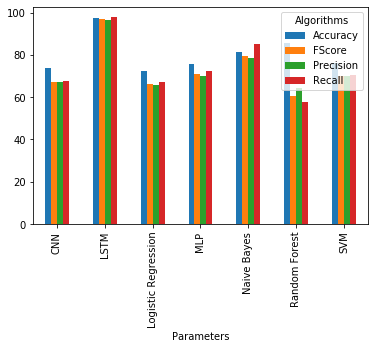

In [22]:
#Comparison Graph
df = pd.DataFrame([['SVM','Precision',precision[0]],['SVM','Recall',recall[0]],['SVM','Accuracy',accuracy[0]],['SVM','FScore',fscore[0]],
                       ['Random Forest','Precision',precision[1]],['Random Forest','Recall',recall[1]],['Random Forest','Accuracy',accuracy[1]],['Random Forest','FScore',fscore[1]],
                       ['Naive Bayes','Precision',precision[2]],['Naive Bayes','Recall',recall[2]],['Naive Bayes','Accuracy',accuracy[2]],['Naive Bayes','FScore',fscore[2]],
                       ['Logistic Regression','Precision',precision[3]],['Logistic Regression','Recall',recall[3]],['Logistic Regression','Accuracy',accuracy[3]],['Logistic Regression','FScore',fscore[3]],
                       ['MLP','Precision',precision[4]],['MLP','Recall',recall[4]],['MLP','Accuracy',accuracy[4]],['MLP','FScore',fscore[4]],
                       ['CNN','Precision',precision[5]],['CNN','Recall',recall[5]],['CNN','Accuracy',accuracy[5]],['CNN','FScore',fscore[5]],
                       ['LSTM','Precision',precision[6]],['LSTM','Recall',recall[6]],['LSTM','Accuracy',accuracy[6]],['LSTM','FScore',fscore[6]],
                      ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.show()